# Code for AMAS project 1
### *By Niels August Davidsen*

In [36]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

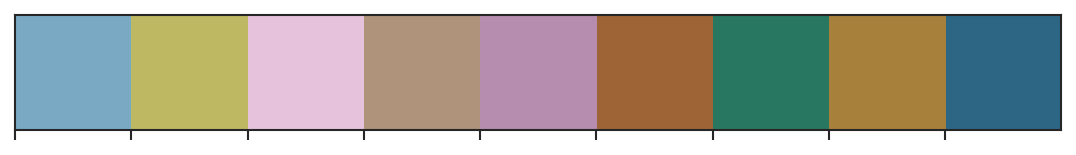

In [46]:
sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})
colors = sns.color_palette('colorblind', 10, desat = 0.5)
colors = colors[::-1]
colors.pop(2)
sns.set_palette(colors)
sns.palplot(colors)



plt.rcParams['axes.grid'] = True
#plt.rcParams['axes.grid.axis'] = 'y'
#plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150
#plt.style.use('seaborn-v0_8')

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [53]:
url_2014 = 'https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/data/2014KenPomeroy.html'
url_2009 = 'https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/data/2009KenPomeroy.html'

In [54]:

# URL of the webpage


# Send a GET request to the webpage
response = requests.get(url_2014)
response.raise_for_status()  # Ensure the request was successful

# Parse the webpage content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table using soup (BS4) - Table id is found by inspecting the HTML file of the webpage
table = soup.find('table', {'id': 'ratings-table'})

# Extract table headers
headers = [th.get_text() for th in table.find('thead').find_all('th')]
headers = list(filter(lambda x: x != '', headers))
headers = headers[2:]
print(headers)

# Finding strings with ONLY integers of length 1, 2 or 3
pattern = re.compile(r'^\d{1,3}$')
reg_city = re.compile(r'\d{1,2}$')

# Extract table rows
rows = []
for row_number,row in enumerate(table.find('tbody').find_all('tr')):
    cells = row.find_all(['th', 'td'])
    cells_text = [cell.get_text() for cell in cells]

    if cells_text[0] == '' or cells_text[0] == ' ':
        continue
    
    # Remove elements in cells_text that concists ONLY of integers of length 1, 2 or 3
    for i, element in enumerate(cells_text):

        if pattern.match(element) and i > 1:
            cells_text.pop(i)

    reg_search = reg_city.search(cells_text[1])
    if reg_search is not None:
        cells_text[1] = cells_text[1][:- ( len(reg_search.group(0) ) + 1 )]

    # Creating an fail-safe for the case where the length of cells_text does not match the length of headers
    if len(cells_text) != len(headers):
        print(len(cells_text), len(headers))
        print(f'Error: Length of cells_text does not match length of headers in row {row_number}')
    
    rows.append(cells_text)



['Rk', 'Team', 'Conf', 'W-L', 'NetRtg', 'ORtg', 'DRtg', 'AdjT', 'Luck', 'NetRtg', 'ORtg', 'DRtg', 'NetRtg']


In [29]:
df = pd.DataFrame(rows, columns=headers)                                # Create a DataFrame from the rows
df.to_csv('kenpom_2014_ratings.csv', index=False)                       # Save the DataFrame to a CSV file

display(df)                                                             # Display the DataFrame

,Rk,Team,Conf,W-L,NetRtg,ORtg,DRtg,AdjT,Luck,NetRtg,ORtg,DRtg,NetRtg
0,1,Louisville,Amer,31-6,+30.41,118.9,88.5,67.2,-.045,+4.31,107.0,102.7,-4.65
1,2,Arizona,P12,33-5,+30.11,116.5,86.4,62.8,+.014,+9.30,109.9,100.6,+1.62
2,3,Florida,SEC,36-3,+28.57,116.5,88.0,61.3,+.053,+9.02,109.4,100.4,+2.39
3,4,Virginia,ACC,30-7,+26.46,114.8,88.3,59.5,+.012,+8.67,109.4,100.8,+1.57
4,5,Wisconsin,B10,30-8,+25.89,122.0,96.1,62.4,+.019,+11.44,110.2,98.8,+3.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,347,Mississippi Valley St.,SWAC,9-23,-22.93,93.0,115.9,70.9,+.012,-8.65,98.8,107.4,+6.21
355,348,Abilene Christian,Slnd,11-20,-23.35,94.0,117.3,63.2,-.045,-2.67,104.7,107.4,+13.38
356,349,Presbyterian,BSth,6-26,-25.87,94.2,120.0,63.5,-.017,-7.84,101.7,109.6,-7.05
357,350,Grambling St.,SWAC,5-24,-26.60,95.5,122.1,66.0,-.017,-9.05,98.7,107.8,+6.51


      DRtg   DRtg
3     88.3  100.8
7    100.4  100.5
15    95.0  100.4
17    93.0  102.2
28    94.2  101.6
37    97.4  100.1
43    95.2  100.4
51    93.7  102.6
62   102.4  100.7
77    99.3  101.5
97   105.8  102.2
115   99.6  102.2
118  101.6  102.2
144  111.8   99.5
177  100.8  102.6
      DRtg   DRtg
2     88.0  100.4
9     94.2  100.8
12    95.8   99.8
44    96.9  102.5
59    98.5  100.7
69   103.2  101.4
78    99.6  102.2
84   102.3  101.3
87    99.2  101.2
110   98.6  101.4
111   95.9  103.5
113  102.2  100.9
124  105.4  102.2
209  103.6  103.3
      DRtg   DRtg
4     96.1   98.8
8     94.7   99.7
11   100.5   98.6
18    88.0  101.4
21    99.8  100.2
46    99.9  100.7
53    93.4  100.4
56    96.1   99.1
63    96.2  101.8
82   101.3  100.1
94   100.5  100.8
136   94.9  100.7
      DRtg   DRtg
175  107.0  110.0
220  111.9  110.1
231  114.1  109.9
237  111.3  108.7
265  111.6  109.3
267  108.1  109.7
269  112.1  108.7
281  112.8  109.6
283  111.7  110.9
308  108.5  110.5
358  114.6

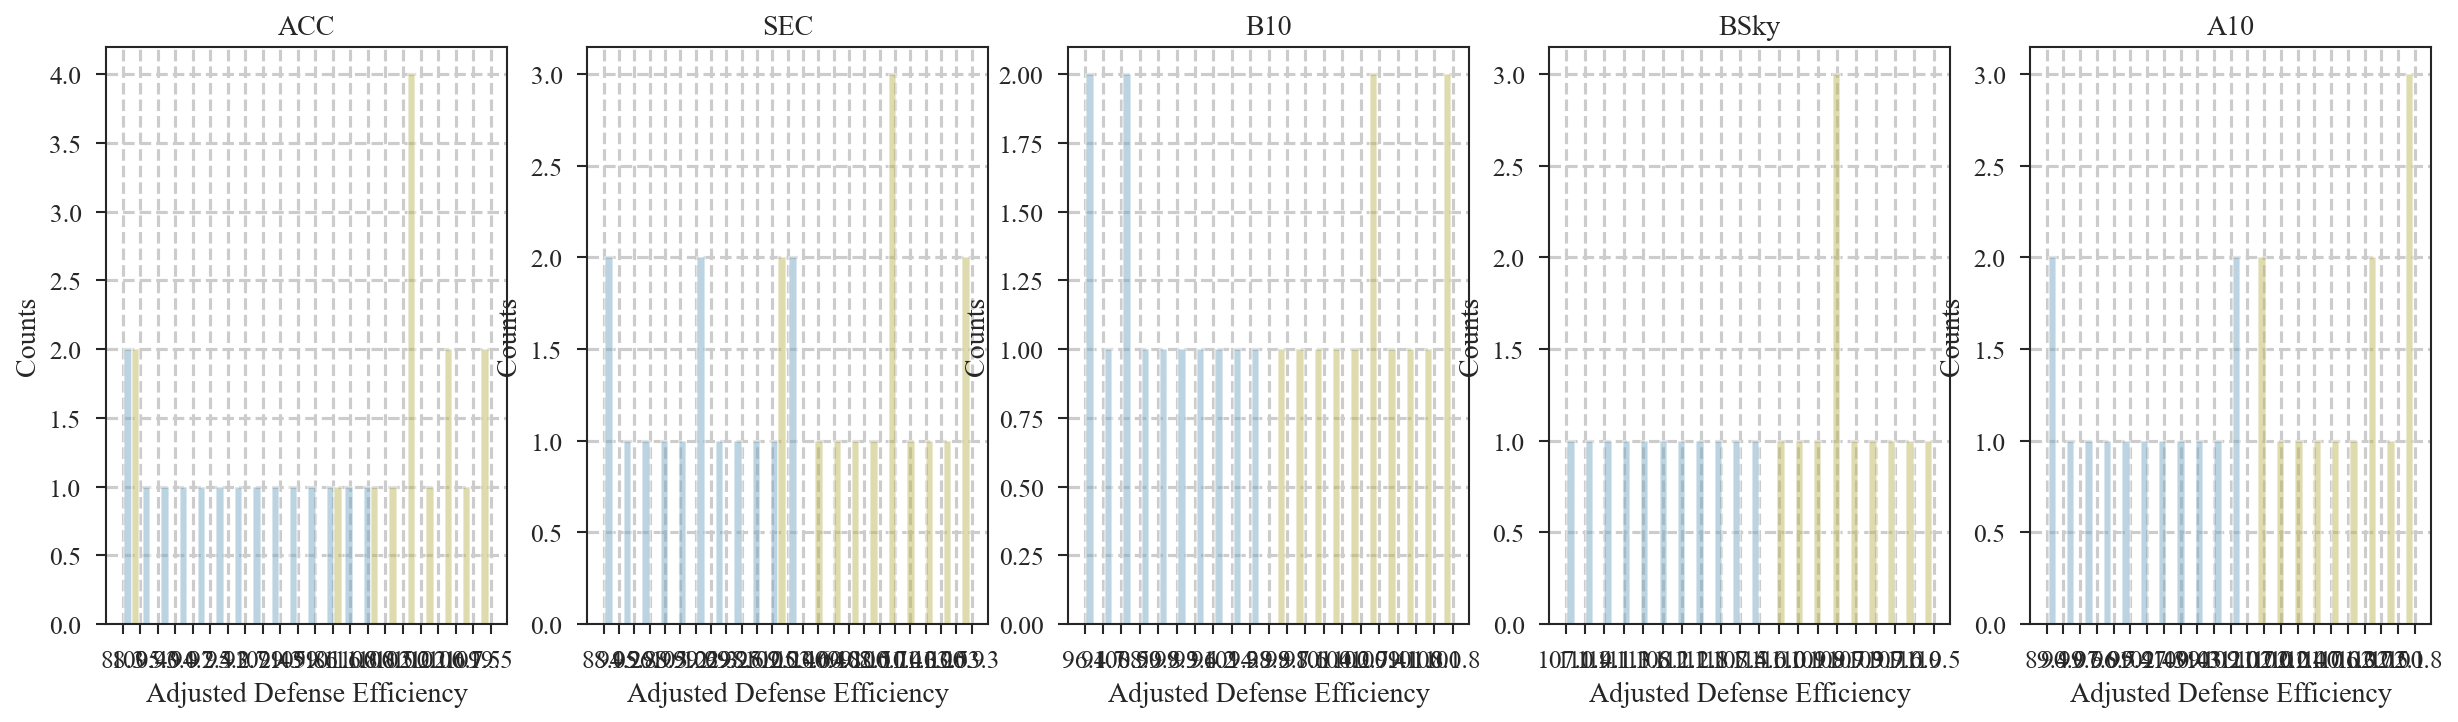

In [49]:
# Grouping the data into conferences (ACC, SEC, B10, BSky and A10)

conf_names = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
fig_conf, ax_conf = plt.subplots(1, 5, figsize=(20, 5), dpi = 150)

for i, conf in enumerate(conf_names):
    conf_teams = df[df['Conf'] == conf]
    print(conf_teams['DRtg'])
    ax_conf[i].hist(conf_teams['DRtg'], bins=20, alpha=0.5, label=conf)
    ax_conf[i].set_title(conf)
    ax_conf[i].set_xlabel('Adjusted Defense Efficiency')
    ax_conf[i].set_ylabel('Counts')